# Mathematik für Biologiestudierende

Wintersemester 2023/24

20.12.2023

&copy; 2023 Prof. Dr. Rüdiger W. Braun 

## Vorlesungsevaluation

* Bitte füllen Sie den Evaluationsbogen aus 
* Bitte stecken Sie den ausgefüllten Bogen in den Briefumschlag, der durch die Reihen geht

| Nr | Tag | Zeit  | Leitung|  | Nr | Tag | Zeit  | Leitung         |
|:--:|:---:|------:|:------:|--|:--:|:---:|------:|:---------------:|
| 1  | Mo  | 14:30 | Adams  |  | 6  | Mi  | 16:30 | Dubovci         |
| 2  | Di  |  8:30 | Dubovci|  | 7  | Do  | 12:30 | Mones           |
| 3  | Di  |  9:30 | Dubovci|  | 8  | Do  | 12:30 | Dreher (online) |
| 4  | Di  | 14:30 | Pukhova|  | 9  | Do  | 16:30 | Dreher (online) |
| 5  | Mi  |  9:30 | Adams  |  |10  | Do  | 14:30 | Mones           |

# Fehler erster und zweiter Art

* *Der Fehler 1. Art* ist die fälschliche Ablehnung der Nullhypothese.
* *Der Fehler 2. Art* ist die fälschliche Beibehaltung der Nullhypothese 

Die Priorität liegt auf der Vermeidung des Fehlers 1. Art.  Diese Asymmetrie ist ein entscheidendes Merkmal der Testtheorie.

|                     | $H_0$ wird beibehalten | $H_0$ wird abgelehnt  |
|---------------------|:----------------------:|:---------------------:|
| $H_0$ **trifft zu** | richtige Entscheidung  | Fehler 1. Art         |
| $H_1$ **trifft zu** | Fehler 2. Art          | richtige Entscheidung |

* Fehlerwahrscheinlichkeit 1. Art soll kleiner sein als das Signifikanzniveau $\alpha$
* Die Komplementärwhrscheinlichkeit der Fehlerwahrscheinlichkiet 2. Art ist die Power

## Ein- und zweiseitige Tests

* Ein ja/nein-Experiment mit unbekannter Erfolgswahrscheinlichkeit $p$ wird $n$-mal wiederholt
* Ziel:  Aussage über $p$ relativ zu einem Referenzwert $p_0$ 
* verschiedene Nullhypothesen sind denkbar
  * $H_0 : p\ge p_0$: einseitiger unterer Test
  * $H_0 : p \le p_0$: einseitiger oberer Test
  * $H_0 : p = p_0$: zweiseitiger Test

Einseitige Tests hatten wir in Lektion 8 besprochen

## Beispiel: Mutationen

* In einer Population weist normalerweise jedes 250te Individuum eine gewisse Mutation auf.  
* Bei einer Untersuchung von 2000 Individuen werden nun aber sogar 12 Träger der Mutation gefunden. 

Zwei Interpretationen sind denkbar

* Eine Steigerung der Mutationshäufigkeit um 50% wurde entdeckt
* Unter 2000 Individuen wurden gerade mal vier Ausreißer entdeckt

#### Statistics to the rescue!

* Bevor wir diese Entdeckung an die Presse geben, wollen wir sicher sein, dass die Mutationsrate tatsächlich gestiegen ist
* Sicherheit ist relativ.  Mit einem Irrtumsrisiko von 5% können wir leben

## Binomialtest für das Beispiel

* Wir machen einen Binomialtest.  Die Referenzwahrscheinlichkeit ist $p_0 = 0.004$
* Die Nullhypothese ist $H_0 = \{ p \le p_0 \}$
    * Es handelt sich um einen einseitigen, oberen Binomialtest
    * Das Signifikanzniveau beträgt $\alpha = 0.05$

* Der kritische Wert $c$ ist so zu wählen, dass `P.cdf(c-1)`$<1-\alpha$ und `P.cdf(c)`$\ge1-\alpha$

* Entscheidungsregel:
     * Die Nullhypothese wird abgelehnt, falls die Anzahl der Erfolge echt größer als $c$ ist
     * Die Nullhypothese wird beibehalten, falls die Anzahl der Erfolge höchstens $c$ ist

In [1]:
from scipy import stats
P = stats.binom(2000, 0.004)
alpha = 0.05

In [2]:
P.ppf(1-alpha)

13.0

### Mutation: Entscheidung

* Die Rechnung ergibt $c = 13$
* Bei bis zu 13 Erfolgen (einschließlich) wird die Nullhypothese beibehalten
* Wir haben nur 12 Mutationen beobachtet:  Nullhypothese wir beibehalten
* Keine signifikante Erhöhung beobachtet

## Der *p*-Wert

* Der $p$-Wert ist das kleinste Signifikanzniveau, zu dem die Daten den Test noch bestehen würden.
* Der $p$-Wert beantwortet die Frage
>  Wie knapp wurde das vorgeschriebene Signifikanzniveau eingehalten bzw. verfehlt?
* Wenn $\alpha$ das Signifikanzniveau ist
  * $p \le \alpha$: Nullhypothese wird abgelehnt 
  * $p > \alpha$: Nullhypothese wird beibehalten

In [3]:
res = stats.binomtest(12, 2000, 0.004, alternative="greater")
res.pvalue

0.1114898591368222

## Power des Tests

* Was ist die Power des Tests, wenn eine Erhöhung der Mutationsrate um 50%, also von $p_0=0.004$ auf $p=0.006$ entdeckt werden soll?
* $H_0$ wird abgelehnt bei mindestens 14 Erfolgen

In [5]:
Q = stats.binom(2000, 0.006)

* Wenn 13 oder weniger Erfolge beobachtet werden, mache ich den Fehler zweiter Art
* Also ist die Fehlerwahrscheinlichkeit zweiter Art gleich

In [6]:
Q.cdf(13)

0.6818540941767759

und die Power ist gleich

In [7]:
1 - Q.cdf(13)

0.3181459058232241

## Zweiseitiger Binomialtest zum Niveau  $\alpha$

* Gegeben sind unabhängige $B(1, p)$-verteilte Zufallsvariable $X_1, \dots, X_n$ mit unbekanntem $p$ sowie ein Signifikanzniveau $\alpha$
* Verglichen werden soll mit einem Referenzwert $p_0$
* Getestet wird die Nullhypothese $H_0 = \{p = p_0\}$ gegen die Alternative $H_1 = \{p \ne p_0\}$
* `P` ist die Binomialverteilung $B_{n,p_0}$
* Der *untere kritische Wert* $c_1$ ist so zu wählen, dass `P.cdf(c1 - 1)`$\le\frac\alpha2$ und `P.cdf(c1)`$>\frac\alpha2$
* Der *obere kritische Wert* $c_2$ ist so zu wählen, dass `P.cdf(c2 - 1)`$<1-\frac\alpha2$ und `P.cdf(c2)`$\ge1-\frac\alpha2$

Der zweiseitige Binomialtest besteht also aus einem unteren und einem oberen einseitigen Binomialtest, die aber beide zum halben Signifikanzniveau durchgeführt werden

## Zweiseitiger Binomialtest, Beispiel

* Bei 250 Würfen eines Würfels fiel 55 mal eine Sechs.  Kann man zu 95% sicher sein, dass der Würfel gezinkt ist?
* Sei $p$ die unbekannte Wahrscheinlichkeit des Würfels für eine Sechs
* Zweiseitiger Binomialtest mit
  * Nullhypothese: $H_0 = \left\{ p = \frac16 \right\}$
  * Alternative: $H_1 = \left\{ p \ne \frac16 \right\}$
  * Signifikanzniveau ist $\alpha = 0.05$

In [8]:
P = stats.binom(250, 1/6)
alpha = 0.05

In [9]:
c1 = P.ppf(alpha/2)
c1

30.0

In [10]:
c2 = P.ppf(1-alpha/2)
c2

54.0

Punktrechnung vor Strichrechnung

Achtung:  keine Seite der HHU: https://www.spiegel.de/spiegel/print/index-2023.html

### Beispiel, Fortsetzung

* $c_1 = 30$ und $c_2 = 54$
* Die Nullhypothese kann zum Niveau $\alpha = 0.05$ abgelehnt werden, wenn höchstens 29 oder mindestens 55 Sechsen fallen
* Bei 55 Sechsen kann die Nullhypothese also abgelehnt werden
* Wir können mit 95% Sicherheit sagen, dass der Würfel gezinkt ist

<img src="bilder/b250.svg" alt="Fehler zweiter Art für das Würfelbeispiel" width="55%"/>

Gelbe Balken zeigen Fehlentscheidungen

## *p*-Wert des zweiseitigen Tests

In [11]:
res = stats.binomtest(55, 250, 1/6)  # "zweiseitig" ist die Standardeinstellung
res.pvalue

0.02718643157092374

## Power des zweiseitigen Tests

* Wir wollen erkennen können, wenn der Würfel so stark gezinkt ist,  dass die Wahrscheinlichkeit für eine Sechs 20% beträgt.  Was ist dann die Power des Tests?

* Die Wahrscheinlichkeit der richtigen Entscheidung ist
$$  \sum_{k=0}^{29} B_{250,\,0.2}(k) + \sum_{k=55}^{250} B_{250,\,0.2}(k) $$

In [12]:
Q = stats.binom(250, 0.2)

In [13]:
erste_summe = Q.cdf(29)
erste_summe

0.0002997560505954973

In [14]:
zweite_summe = 1 - Q.cdf(54)
zweite_summe

0.2359822558674649

In [15]:
power = erste_summe + zweite_summe
power

0.2362820119180604

# Versuchsplanung

* Im Beispiel "Mutation" hatten wir für n=2000 eine Power von 32% erzielt.  
* Welche Power hätten wir für n=10000?

In [16]:
n = 10000
alpha = 0.05
p0 = 0.004
P = stats.binom(n, p0)
c = P.ppf(1-alpha)
c

51.0

In [17]:
p = 0.006
Q = stats.binom(n, p)
1 - Q.cdf(c)

0.865685152339395

In [18]:
n = 20000
P = stats.binom(n, p0)
c = P.ppf(1-alpha)
c

95.0

In [19]:
Q = stats.binom(n, p)
1 - Q.cdf(c)

0.989577529617209

In [20]:
n = 12000
P = stats.binom(n, p0)
c = P.ppf(1-alpha)
c

60.0

In [21]:
Q = stats.binom(n, p)
1 - Q.cdf(c)

0.9158835701280577

* Genaue Wert sind hier nicht nötig, weil der Wert p=0.006 auch nur geschätzt ist
* Deswegen genügt es, mit copy und paste ein halbes Dutzend Szenarien zu rechnen

Geht natürlich auch automatisch (Kür)

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns

In [23]:
df = pd.DataFrame()
df['n'] = 100*np.arange(10, 200)
df['c'] = stats.binom(df.n, p0).ppf(1-alpha)
df['power'] = 1 - stats.binom(df.n, p).cdf(df.c)
df

,n,c,power
0,1000,8.0,0.152140
1,1100,8.0,0.219930
2,1200,9.0,0.189770
3,1300,9.0,0.258454
4,1400,10.0,0.225176
...,...,...,...
185,19500,93.0,0.987539
186,19600,93.0,0.989168
187,19700,94.0,0.987781
188,19800,94.0,0.989375


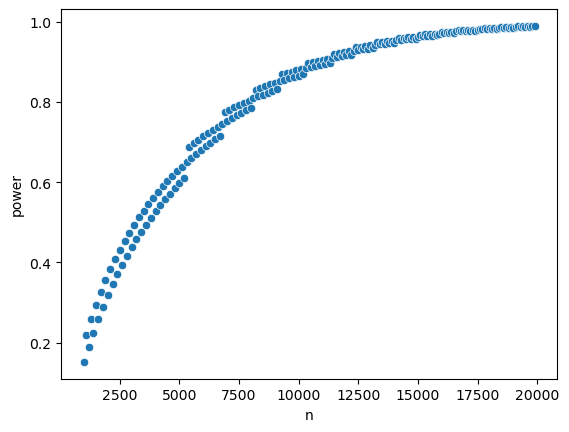

In [24]:
sns.scatterplot(data=df, x='n', y='power');

Hier ist das Problem, dass der Unterschied zwischen 0.004 und 0.006 zu gering ist

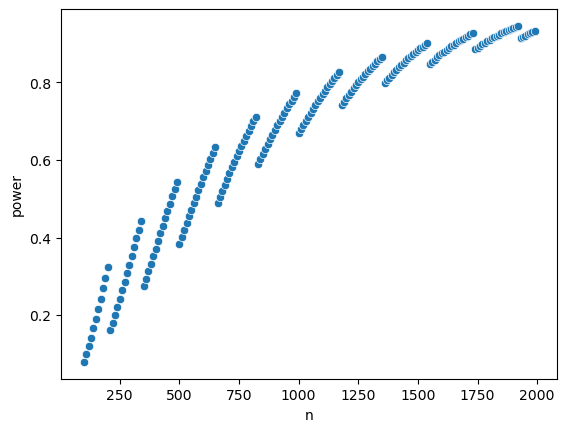

In [25]:
p = 0.01
df = pd.DataFrame()
df['n'] = 10*np.arange(10, 200)
df['c'] = stats.binom(df.n, p0).ppf(1-alpha)
df['power'] = 1 - stats.binom(df.n, p).cdf(df.c)
sns.scatterplot(data=df, x='n', y='power');

# Differentialrechnung 

Differentialrechnung kommt in der Biologie vor

* Bestimmung von Maxima und Minima:  mehrdimensionale Kurvendiskussion
  * in der Statistik
    * Maximum-Likelihood Schätzer 
    * z.B. in der Statistik linearer Modelle (Thema im zweiten Semester, passiert aber "unter der Haube")
* Bei der Modellierung von Prozessen:  Dynamische Systeme
* Integrale:  die Verteilungsfunktionen von kontinuierlichen Zufallsvariablen sind Integrale

### Ableitung als Tangentensteigung

<img src="bilder/skizze_abl.svg" alt="Funktion und Tangente" width="45%"/>

Die *Ableitung* einer Funktion $f$ an einer Stelle $x$ gibt die Steigung der Tangente in $x$ an

Die Tangentensteigung wird durch Sekantensteigungen approximiert

<img src="bilder/skizze_sek1.svg" alt="Funktion und Tangente" width="45%"/>

## Ableitungen wichtiger Funktionen
\begin{align*}
    f(x) &= C & f'(x) &= 0 & \text{Konstante} \\[2ex]
    f(x) &= x^n & f'(x) &= n \cdot x^{n-1} \\[2ex]
    f(x) &= \frac1x & f'(x) &= -\frac1{x^2} \\[2ex]
    f(x) &= \exp(x) & f'(x) &= \exp(x) \\[2ex]
    f(x) &= \ln(x) & f'(x) &= \frac1x 
\end{align*}

# Ableitungsregeln

| $$ h(x) $$         |   $$ h'(x) $$                         |              |
|:------------------:|:-------------------------------------:|:-------------|
| $Cf(x)$            |   $C f'(x)$                           |              |
| $f(x) + g(x)$      |  $f'(x) + g'(x)$                      |              |
| $f(x) \cdot g(x)$  | $f'(x) \cdot g(x) + f(x) \cdot g'(x)$ | Produktregel |
| $f(g(x))$          | $f'(g(x)) \cdot g'(x)$                | Kettenregel  |

Hierbei ist $C$ eine Konstante

### Beispiel

$f(x) = x^2 \cdot \exp(-x)$

\begin{align*}
  f'(x) &= \left(x^2\right)' \cdot \exp(-x) + x^2 \cdot \left( \exp(-x) \right)' & & \text{Produktregel} \\
  &= 2x \cdot \exp(-x) + x^2 \cdot(-1) \cdot \exp(-x) & & \text{Kettenregel} \\
  &= \left( 2x - x^2 \right) \cdot \exp(-x) & & \text{Distributivgesetz}
\end{align*}

## Qualitatives Verhalten

* wenn $f'(x)>0$, dann wächst die Funktion
* wenn $f'(x)<0$, dann fällt sie

## Beispiel:  Inflation

* die Inflationsrate ist die Ableitung des Preises

* seit unvordenklichen Zeiten ist die Inflationsrate positiv:  Preise steigen
* in 2022 stieg auch die Inflationsrate:  Preise steigen noch schlimmer
* in den letzten Monaten ist die Inflationsrate gefallen (4% Inflation statt 10%):  Preise steigen

# Frohe Feiertage und Alles Gute für 2024!

<img src="bilder/keks.jpg" alt="Funktion und Tangente" width="45%"/>